# Importing libraries

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [37]:
pwd

'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project'

# Loading pandas data frame using using panda library

In [38]:
df = pd.read_csv(r'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project\\startup_funding.csv' , encoding ='utf-8')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# Correcting spell errors in Startup Columns of the Data Frame

Converting all the strings in startup column to lower alphabet Finding wrong spellings of major startup such as flipkart,oyo,ola and paytym replacing incorrect values of the these start up in the Data Frame

In [39]:
df['StartupName'] = df['StartupName'].str.lower()
df['StartupName'].replace(['flipkart.com','flipkart'],'flipkart',inplace=True)
df['StartupName'].replace(['oyo rooms','oyorooms','oyo'],'oyo',inplace=True)
df['StartupName'].replace(['ola','ola cabs'],'ola',inplace=True)
df['StartupName'].replace(['paytm marketplace','paytm'],'paytm',inplace=True)

# Correcting spell errors in InvestmentType Columns of the Data Frame

In [40]:
invest_type = df['InvestmentType']
invest_type = invest_type.unique()
invest_type

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

## Correcting Spelling of Seed Funding, Private Equity and Crowd Funding in DataFrame

In [41]:
df['InvestmentType'].replace('SeedFunding',"Seed Funding",inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)


## keeping only rows having InvestmentType as  Private Equity

In [42]:
arr = df[['InvestorsName','InvestmentType','StartupName']]
arr1= arr[arr['InvestmentType'] == 'Private Equity']
arr1


,InvestorsName,InvestmentType,StartupName
0,Kae Capital,Private Equity,touchkin
1,Triton Investment Advisors,Private Equity,ethinos
6,"Infuse Ventures, JLL",Private Equity,ecolibriumenergy
7,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,droom
8,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,jumbotail
...,...,...,...
2366,"Kalaari Capital, Sequoia Capital",Private Equity,grabhouse.com
2367,Asia Pacific Internet Group,Private Equity,printvenue
2368,KARSEMVEN Fund,Private Equity,graphene
2369,"Exfinity Fund, GrowX Ventures.",Private Equity,mad street den


In [43]:
arr1.drop('InvestmentType',inplace=True,axis = 1)#dropping null values from data Frame and dropping column investment type
arr1

C:\Users\Aman Bhalla\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,InvestorsName,StartupName
0,Kae Capital,touchkin
1,Triton Investment Advisors,ethinos
6,"Infuse Ventures, JLL",ecolibriumenergy
7,"Asset Management (Asia) Ltd, Digital Garage Inc",droom
8,"Kalaari Capital, Nexus India Capital Advisors",jumbotail
...,...,...
2366,"Kalaari Capital, Sequoia Capital",grabhouse.com
2367,Asia Pacific Internet Group,printvenue
2368,KARSEMVEN Fund,graphene
2369,"Exfinity Fund, GrowX Ventures.",mad street den


## Splitting the (, ) separated investors in Data Frame to new Data Frame

In [44]:
arr2 = arr1['InvestorsName'].str.split(',',expand=True)
arr2.columns =['c0','c1','c2','c3','c4','c5','c6']
arr2['StartupName'] = arr1['StartupName']
arr2

,c0,c1,c2,c3,c4,c5,c6,StartupName
0,Kae Capital,None,None,None,None,None,None,touchkin
1,Triton Investment Advisors,None,None,None,None,None,None,ethinos
6,Infuse Ventures,JLL,None,None,None,None,None,ecolibriumenergy
7,Asset Management (Asia) Ltd,Digital Garage Inc,None,None,None,None,None,droom
8,Kalaari Capital,Nexus India Capital Advisors,None,None,None,None,None,jumbotail
...,...,...,...,...,...,...,...,...
2366,Kalaari Capital,Sequoia Capital,None,None,None,None,None,grabhouse.com
2367,Asia Pacific Internet Group,None,None,None,None,None,None,printvenue
2368,KARSEMVEN Fund,None,None,None,None,None,None,graphene
2369,Exfinity Fund,GrowX Ventures.,None,None,None,None,None,mad street den


In [45]:
#getting unique startupname values from the data frame
arr3 = arr2['StartupName'].unique()
arr3

array(['touchkin', 'ethinos', 'ecolibriumenergy', 'droom', 'jumbotail',
       'moglix', 'timesaverz', 'autorox.co', 'fabogo', 'innoviti',
       'vdeliver', 'chumbak', 'vayana', 'mobiquest', 'rentomojo',
       'noticeboard', 'byju’s', 'fab hotels', '1mg', 'bigstylist',
       'rentongo', 'goomo', 'maxmywealth', 'spinny', 'ftcash',
       'bhive workspace', 'gyandhan', 'hungry foal',
       'multiplier solutions', 'abi health', 'boxx.ai', 'peesafe.in',
       'coverfox', 'hypertrack', 'goodera', 'digit', 'ola', 'moneytap',
       'goodbox', 'unbxd', 'darwinbox', 'insider.in', 'fynd', 'grow fit',
       'mswipe', 'oneassist', 'julia computing', 'kissht', 'loantap',
       'hug innovations', 'flipkart', 'v resorts', 'stashfin', 'formcept',
       'rubique', 'niki.ai', 'fitpass', 'zinghr', 'tagos design',
       'urbanclap', 'ace2three', 'power2sme', '4tigo', 'smecorner',
       'healthians', 'good methods global', 'yepme', 'ace turtle',
       'curefit', 'anchanto', 'sequretek', 'vidool

In [46]:
df1 = arr2.groupby('StartupName')#grouping by according to startup name

# Getting Unique investors of Every Startup

Getting unique values from the arr2 and generating the df for each particular Startup Stripping the values From the each startup and strip them , then adding them into set so only unique investors are collected for a particular startup


In [47]:
# Creating List
l = []
for key in range(len(arr3)):
    df2 = df1.get_group(arr3[key])
    s = set()
    for i in range(len(df2)):
        for j in range(len(df2.columns)):
            if(type(df2.iloc[i,j])==str ):
                s.add(df2.iloc[i,j].strip())# adding elemnets to set
                t = list(s)# Converting set to list
            else:
                continue
    l.append(t)     #appending each list into another list list l
l

[['touchkin', 'Kae Capital'],
 ['ethinos', 'Triton Investment Advisors'],
 ['JLL', 'ecolibriumenergy', 'Infuse Ventures'],
 ['Digital Garage',
  'droom',
  'Digital Garage Inc',
  'Lightbox',
  'Beenos',
  'Beenext',
  'Asset Management (Asia) Ltd'],
 ['Nexus India Capital Advisors', 'Kalaari Capital', 'jumbotail'],
 ['Rocketship',
  'Shailesh Rao',
  'moglix',
  'SeedPlus',
  'International Finance Corporation',
  'Accel Partners',
  'Ratan Tata',
  'Venture Highway',
  'Jungle Ventures',
  'Accel Partner'],
 ['Unilazer Ventures', 'BCCL', 'timesaverz'],
 ['Mitsui & Co.', 'autorox.co'],
 ['Dunamis Ventures Pte Ltd', 'fabogo'],
 ['innoviti',
  'Bessemer Venture Partners',
  'SBI-FMO Fund',
  'Catamaran Ventures',
  'New India Investment Corporation'],
 ['vdeliver', 'Corvus Ventures', 'MAPE Advisory Group'],
 ['chumbak', 'Blacksoil Capital Pvt. Ltd'],
 ['Jungle Ventures', 'vayana', 'IDG Ventures India Advisors'],
 ['One97 Communication Ltd', 'mobiquest'],
 ['ain Capital Ventures',
  'IDG

## Converting list of list into Dictionary

In [48]:
d = {}
for i in range(len(l)):
    for j in range(len(l[i])):
        temp = l[i][j]
        d[temp] = d.get(temp,0)+1


In [49]:
t = {}# taking another dictionary havng no null values from dictionary d
for i in d:
    if(i !=''):# removing null string 
        t[i]=d[i]
del t['Undisclosed Investors']# removing Undisclosed Investors
del t['Undisclosed investors']

##  Getting top 5 unique investors who invest in Private equity

In [50]:
from collections import Counter
dic = dict(Counter(t).most_common(5))
x = [] 
y= []
for i in dic:
    x.append(i) #Getting keys from dictionary
    y.append(dic[i])# Getting Freq of the values
    print(i,dic[i])


Sequoia Capital 43
Accel Partners 42
Kalaari Capital 33
Blume Ventures 27
SAIF Partners 24


# Graph of Unique Investor v/s the no. of times they invested

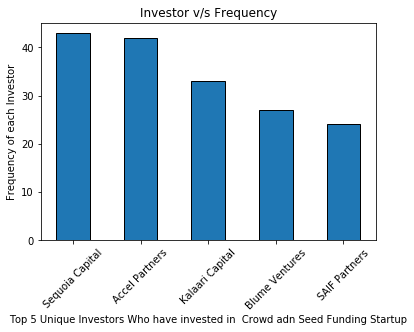

In [51]:
plt.bar(x,y,edgecolor ='black',width=0.5)
plt.xlabel('Top 5 Unique Investors Who have invested in  Crowd adn Seed Funding Startup')
plt.ylabel('Frequency of each Investor')
plt.xticks(rotation =45)
plt.title('Investor v/s Frequency')
plt.show()